In [2]:
import cv2
import numpy as np

# Caricare l'immagine
image_path = "output/369940.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Applicare il rilevamento dei bordi con Canny
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Utilizzare la trasformata di Hough per trovare linee rette
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Creare una copia a colori per disegnare le linee
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Disegnare le linee trovate
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Salvare l'immagine con le linee rilevate
lines_result_path = "lines_detected.png"
cv2.imwrite(lines_result_path, image_with_lines)

lines_result_path


'lines_detected.png'

In [7]:
# Caricare l'immagine
image_path = "output/370147.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Applicare una soglia binaria per distinguere il bianco dal nero
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Trovare i contorni nell'immagine
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creare una maschera vuota per filtrare i contorni
mask = np.zeros_like(image)

# Disegnare solo i contorni con area maggiore di 100 pixel
for contour in contours:
    if cv2.contourArea(contour) > 150:
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

# Applicare la maschera all'immagine originale
filtered_image = cv2.bitwise_and(image, mask)

# Applicare il rilevamento dei bordi con Canny
edges = cv2.Canny(filtered_image, threshold1=50, threshold2=150)

# Utilizzare la trasformata di Hough per trovare linee rette
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Creare una copia a colori per disegnare le linee
image_with_lines = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2BGR)

# Disegnare le linee trovate
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Salvare l'immagine con le linee rilevate
filtered_result_path = "filtered_lines_detected.png"
cv2.imwrite(filtered_result_path, image_with_lines)

filtered_result_path


'filtered_lines_detected.png'

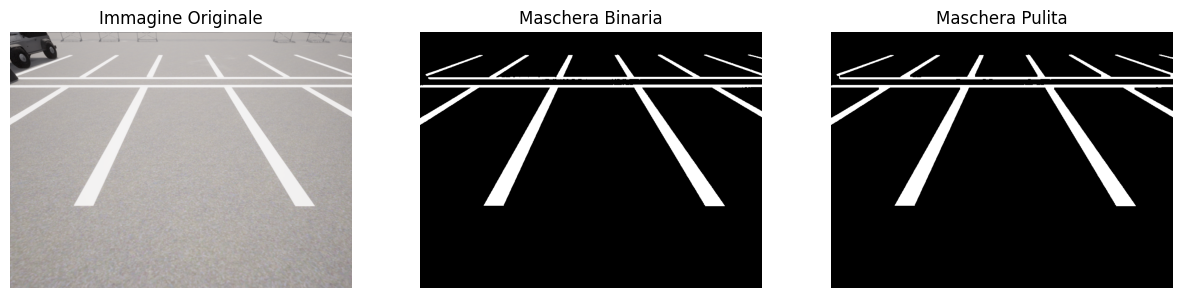

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carichiamo un'immagine di esempio di una strada (sostituire con l'immagine utente se fornita)
image_path = 'output3/4564.png'  # Path placeholder, sostituire con il file dell'utente
try:
    road_image = cv2.imread(image_path)
    road_image_rgb = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)
    
    # Converti l'immagine in scala di grigi
    gray_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)
    
    # Applica una soglia per isolare i pixel chiari
    _, binary_mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
    
    # Applicazione di operazioni morfologiche per rimuovere il rumore
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    
    # Visualizza i risultati
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.title("Immagine Originale")
    plt.imshow(road_image_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Maschera Binaria")
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Maschera Pulita")
    plt.imshow(mask_cleaned, cmap='gray')
    plt.axis('off')
    
    plt.show()

except Exception as e:
    e
